In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#  Folder Paths (Update Paths)
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/The_new_DataSet"
output_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet"
os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

#  Define Columns to Standardize
standardize_columns = ["distance", "angleAzimuth", "angleElevation", "radialVelocity", "rcs"]

#  Function to Standardize a Single Row
def standardize_row(row, scaler):
    """Applies standardization on a per-row basis to maintain data consistency."""
    for col in standardize_columns:
        if isinstance(row[col], list) and len(row[col]) > 0:
            # Convert to NumPy array
            values = np.array(row[col], dtype=float)

            # Standardize only if more than one value exists
            if len(values) > 1:
                values = scaler.fit_transform(values.reshape(-1, 1)).flatten()

            row[col] = list(values)  # Store back as list
    
    return row

#  Process Each File
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        print(f" Standardizing File: {filename}")

        #  Apply Standardization Per Row
        scaler = StandardScaler()
        df = df.apply(lambda row: standardize_row(row, scaler), axis=1)

        #  Save Standardized Data
        output_path = os.path.join(output_folder, filename)
        df.to_pickle(output_path)
        print(f" Standardized Data Saved: {output_path}")

print("\n Standardization Completed! Data is Ready for DBSCAN!")

📂 Standardizing File: combined_194.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet/combined_194.p
📂 Standardizing File: combined_218.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet/combined_218.p
📂 Standardizing File: combined_62.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet/combined_62.p
📂 Standardizing File: combined_197.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet/combined_197.p
📂 Standardizing File: combined_157.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet/combined_157.p
📂 Standardizing File: combined_141.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet/combined_141.p
📂 Standardizing File: combined_148.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_w

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#  Folder Paths (Update Paths)
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Std_DataSet"  # Standardized data input
output_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data"  # Output folder for clustered data
os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

#  Define Clustering Features (Based on Radar Physics)
clustering_features = ["distance", "angleAzimuth", "angleElevation", "radialVelocity", "rcs"]

#  DBSCAN Hyperparameters (Optimized for Radar Data)
DBSCAN_PARAMS = {
    "eps": 2.5,              # Neighborhood distance threshold (meters)
    "min_samples": 4,        # Minimum points required to form a cluster
    "metric": "euclidean",   # Euclidean distance (best for spatial data)
    "algorithm": "ball_tree",# Optimized for high-dimensional data
    "leaf_size": 30          # Balances speed vs accuracy
}

#  Function to Apply DBSCAN Clustering
def apply_dbscan(df):
    """Applies DBSCAN clustering to each row in the dataset."""
    clustered_data = []

    for _, row in df.iterrows():
        #  Extract feature values for clustering
        if not isinstance(row["distance"], list) or len(row["distance"]) == 0:
            continue  # Skip empty rows

        #  Convert detections into a feature matrix
        feature_matrix = np.array([[row[feature][i] for feature in clustering_features] for i in range(len(row["distance"]))])

        #  Normalize Features (DBSCAN works best with normalized data)
        feature_matrix = StandardScaler().fit_transform(feature_matrix)

        #  Apply DBSCAN
        dbscan = DBSCAN(**DBSCAN_PARAMS)
        cluster_labels = dbscan.fit_predict(feature_matrix)

        #  Store Cluster IDs in the Row
        row["cluster_id"] = list(cluster_labels)  # Assign cluster labels to detections
        clustered_data.append(row)

    return pd.DataFrame(clustered_data)

#  Process All Files
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        print(f" Processing File: {filename}")

        #  Apply DBSCAN Clustering
        df_clustered = apply_dbscan(df)

        #  Save Clustered Data
        output_path = os.path.join(output_folder, filename)
        df_clustered.to_pickle(output_path)
        print(f" DBSCAN Clustering Saved: {output_path}")

print("\n🚀 *DBSCAN Clustering Completed for All Files!*")

📂 Processing File: combined_194.p
✅ DBSCAN Clustering Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data/combined_194.p
📂 Processing File: combined_218.p
✅ DBSCAN Clustering Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data/combined_218.p
📂 Processing File: combined_62.p
✅ DBSCAN Clustering Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data/combined_62.p
📂 Processing File: combined_197.p
✅ DBSCAN Clustering Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data/combined_197.p
📂 Processing File: combined_157.p
✅ DBSCAN Clustering Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data/combined_157.p
📂 Processing File: combined_141.p
✅ DBSCAN Clustering Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data/combined_141.p
📂 Processing File: combined_148.p
✅ DBSCAN Clustering 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Folder Paths (Update Paths)
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/dbscan_clustered_data"   # DBSCAN clustered data folder

#  Define Columns to Check
clustering_features = ["distance", "angleAzimuth", "angleElevation", "radialVelocity", "rcs"]

#  Initialize Validation Counters
files_with_issues = []
total_clusters_detected = 0
total_noise_points = 0

#  Function to Validate DBSCAN Clustering
def validate_dbscan(df, filename):
    """Validate the clustering results for a given file."""
    global total_clusters_detected, total_noise_points
    
    #  Check if cluster_id column exists
    if "cluster_id" not in df.columns:
        print(f" {filename}: Missing 'cluster_id' column!")
        return None

    #  Extract all cluster labels
    all_clusters = [cid for sublist in df["cluster_id"] for cid in sublist if isinstance(cid, int)]
    
    if not all_clusters:
        print(f" {filename}: No clusters found!")
        files_with_issues.append({"file": filename, "issue": "No clusters detected"})
        return None

    #  Count unique clusters (excluding noise -1)
    unique_clusters = set(all_clusters)
    num_clusters = len(unique_clusters - {-1})
    num_noise = all_clusters.count(-1)
    
    #  Update Counters
    total_clusters_detected += num_clusters
    total_noise_points += num_noise
    
    #  Check for High Noise Ratio
    noise_ratio = num_noise / len(all_clusters)
    if noise_ratio > 0.4:  # More than 40% of points are noise
        files_with_issues.append({"file": filename, "issue": f"High noise ({noise_ratio*100:.1f}%)"})
    
    #  Print Summary for the File
    print(f" {filename}: {num_clusters} clusters, {num_noise} noise points ({noise_ratio*100:.1f}%)")
    
    return {"clusters": num_clusters, "noise": num_noise}

#  Function to Plot Clusters
def plot_clusters(df, filename):
    """Generate scatter plot for visual validation of clusters."""
    plt.figure(figsize=(8, 6))

    #  Extract relevant data
    cluster_labels = [cid for sublist in df["cluster_id"] for cid in sublist]
    distances = [d for sublist in df["distance"] for d in sublist]
    azimuths = [a for sublist in df["angleAzimuth"] for a in sublist]

    #  Convert to DataFrame
    plot_df = pd.DataFrame({"Cluster": cluster_labels, "Distance": distances, "Azimuth": azimuths})

    #  Scatter Plot (Clustered Points)
    sns.scatterplot(data=plot_df, x="Azimuth", y="Distance", hue="Cluster", palette="tab10", alpha=0.7, edgecolor=None)
    
    plt.title(f"DBSCAN Clusters for {filename}")
    plt.xlabel("Azimuth (degrees)")
    plt.ylabel("Distance (meters)")
    plt.legend(title="Cluster ID", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    
    plt.show()

#  Process All Files
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        print(f"\n Validating File: {filename}")

        #  Validate Clusters
        validation_results = validate_dbscan(df, filename)

        #  Plot Clusters if Validation Passed
        if validation_results:
            plot_clusters(df, filename)

#  Print Final Summary
print("\n *Validation Summary*")
print(f" Total Clusters Detected: {total_clusters_detected}")
print(f" Total Noise Points: {total_noise_points}")

if files_with_issues:
    print(f" Files with Issues ({len(files_with_issues)}):")
    for issue in files_with_issues:
        print(f" {issue['file']}: {issue['issue']}")
else:
    print(" No major issues detected. Clustering looks good!")

print("\n *DBSCAN Validation Completed!*")


🔍 Validating File: combined_194.p
⚠️ combined_194.p: No clusters found!

🔍 Validating File: combined_218.p
⚠️ combined_218.p: No clusters found!

🔍 Validating File: combined_62.p
⚠️ combined_62.p: No clusters found!

🔍 Validating File: combined_197.p
⚠️ combined_197.p: No clusters found!

🔍 Validating File: combined_157.p
⚠️ combined_157.p: No clusters found!

🔍 Validating File: combined_141.p
⚠️ combined_141.p: No clusters found!

🔍 Validating File: combined_148.p
⚠️ combined_148.p: No clusters found!

🔍 Validating File: combined_80.p
⚠️ combined_80.p: No clusters found!

🔍 Validating File: combined_55.p
⚠️ combined_55.p: No clusters found!

🔍 Validating File: combined_210.p
⚠️ combined_210.p: No clusters found!

🔍 Validating File: combined_165.p
⚠️ combined_165.p: No clusters found!

🔍 Validating File: combined_138.p
⚠️ combined_138.p: No clusters found!

🔍 Validating File: combined_227.p
⚠️ combined_227.p: No clusters found!

🔍 Validating File: combined_144.p
⚠️ combined_144.p: No 

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#  Folder Paths (Update Paths)
input_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data"
output_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Standardization_DataSet"
os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

#  Define Columns to Standardize
standardize_columns = ["distance", "angleAzimuth", "angleElevation", "radialVelocity", "rcs"]

#  Function to Standardize a Single Row
def standardize_row(row, scaler):
    """Applies standardization on a per-row basis to maintain data consistency."""
    for col in standardize_columns:
        if isinstance(row[col], list) and len(row[col]) > 0:
            # Convert to NumPy array
            values = np.array(row[col], dtype=float)

            # Standardize only if more than one value exists
            if len(values) > 1:
                values = scaler.fit_transform(values.reshape(-1, 1)).flatten()

            row[col] = list(values)  # Store back as list
    
    return row

#  Process Each File
for filename in os.listdir(input_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(input_folder, filename)
        df = pd.read_pickle(file_path)

        print(f"📂 Standardizing File: {filename}")

        #  Apply Standardization Per Row
        scaler = StandardScaler()
        df = df.apply(lambda row: standardize_row(row, scaler), axis=1)

        #  Save Standardized Data
        output_path = os.path.join(output_folder, filename)
        df.to_pickle(output_path)
        print(f" Standardized Data Saved: {output_path}")

print("\n Standardization Completed! Data is Ready for DBSCAN!")

📂 Standardizing File: combined_194.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Standardization_DataSet/combined_194.p
📂 Standardizing File: combined_218.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Standardization_DataSet/combined_218.p
📂 Standardizing File: combined_62.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Standardization_DataSet/combined_62.p
📂 Standardizing File: combined_197.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Standardization_DataSet/combined_197.p
📂 Standardizing File: combined_157.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Standardization_DataSet/combined_157.p
📂 Standardizing File: combined_141.p
✅ Standardized Data Saved: /home/q674749/workspace/thesis_work/rat25-15.4.1/perception/Standardization_DataSet/combined_141.p
📂 Standardizing File: co


 Validating File: combined_194.p


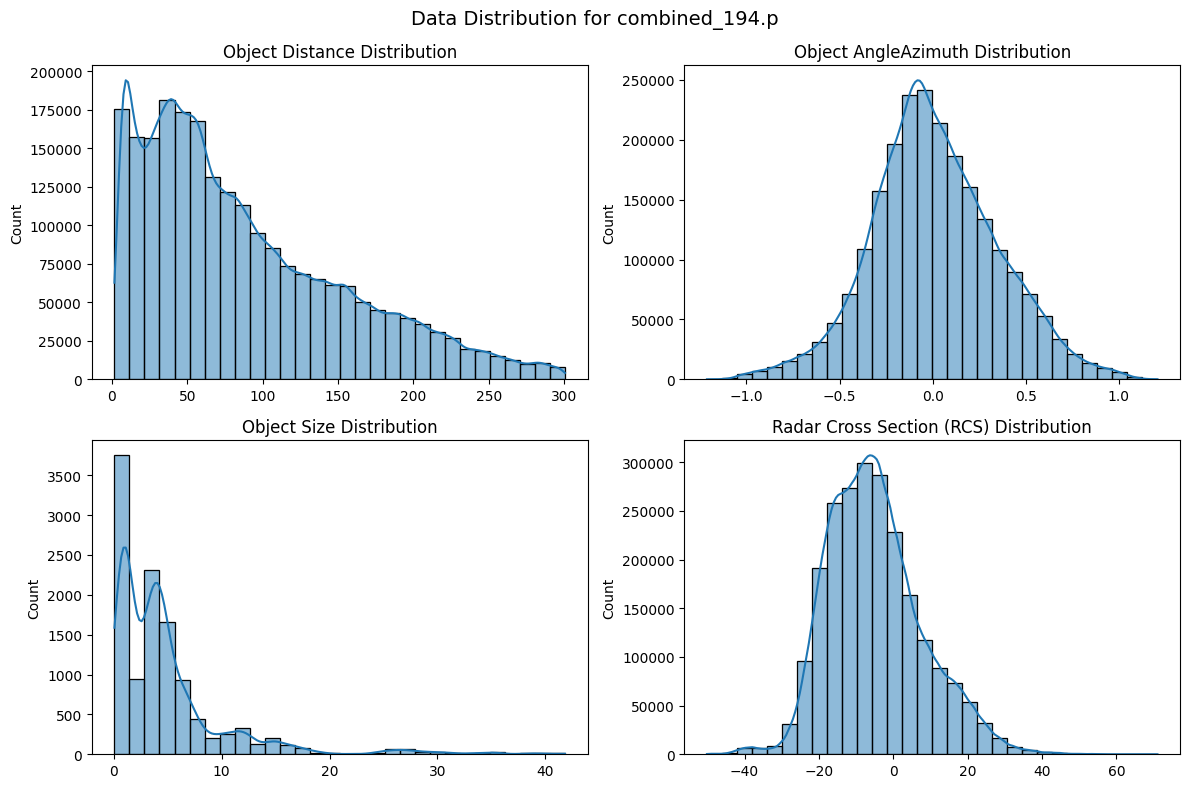


 Validating File: combined_218.p


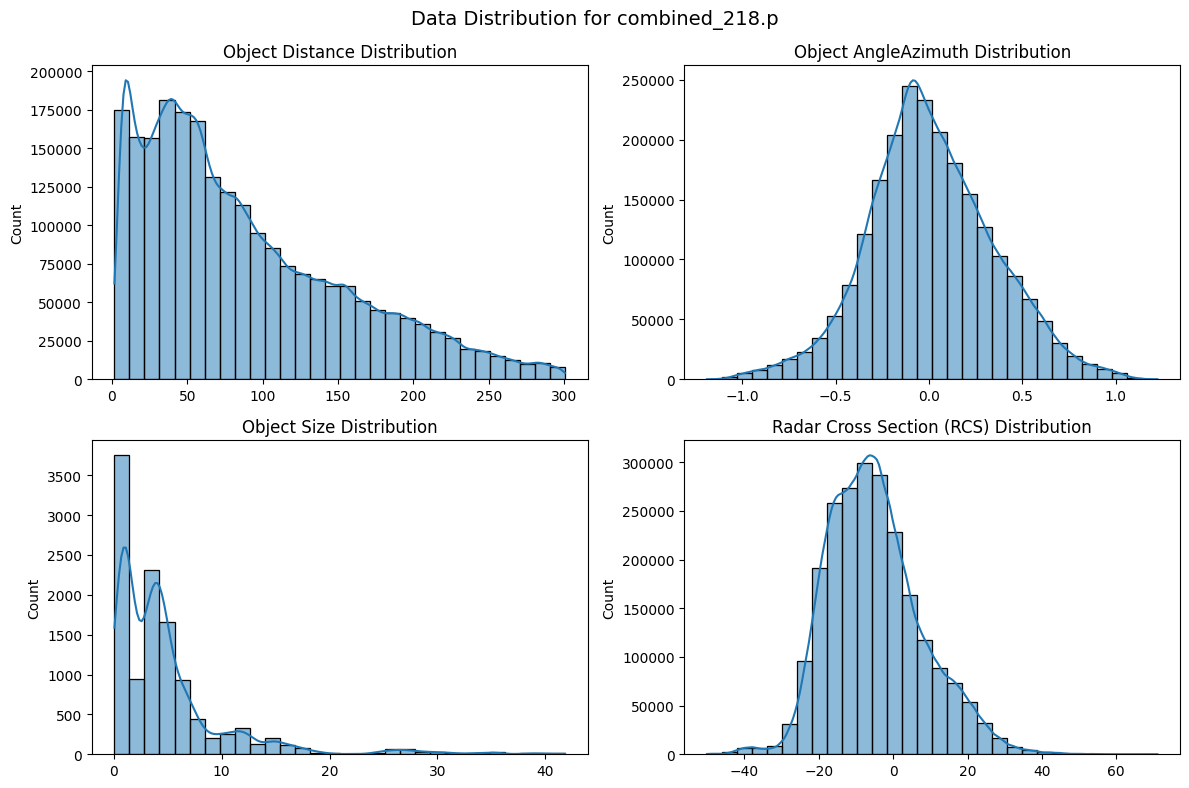


 Validating File: combined_62.p


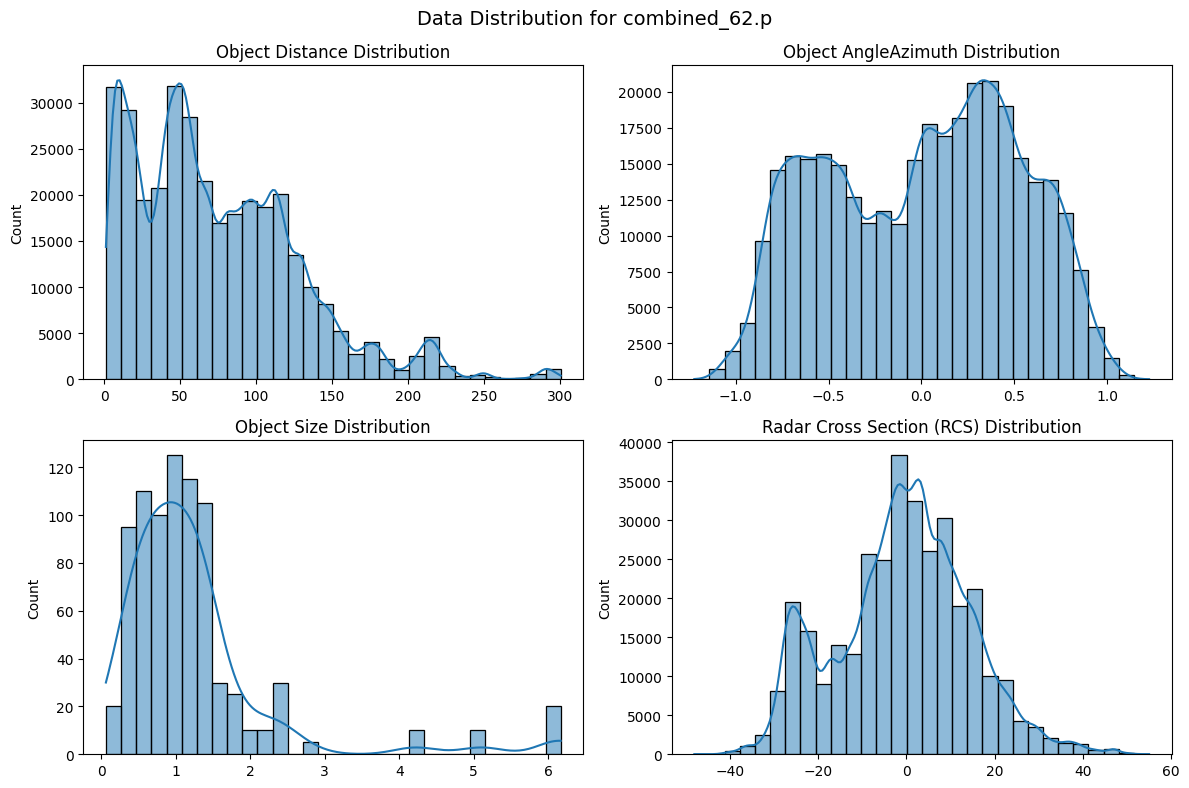


 Validating File: combined_197.p


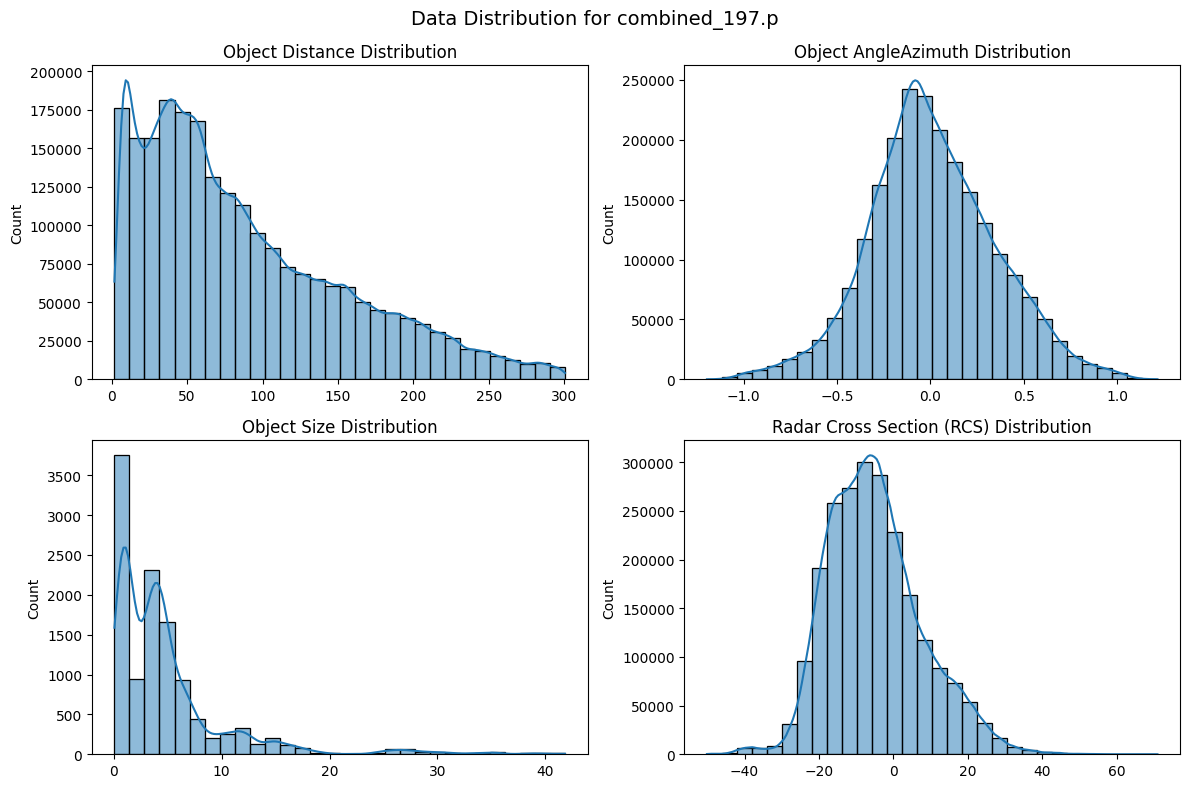


 Validating File: combined_157.p


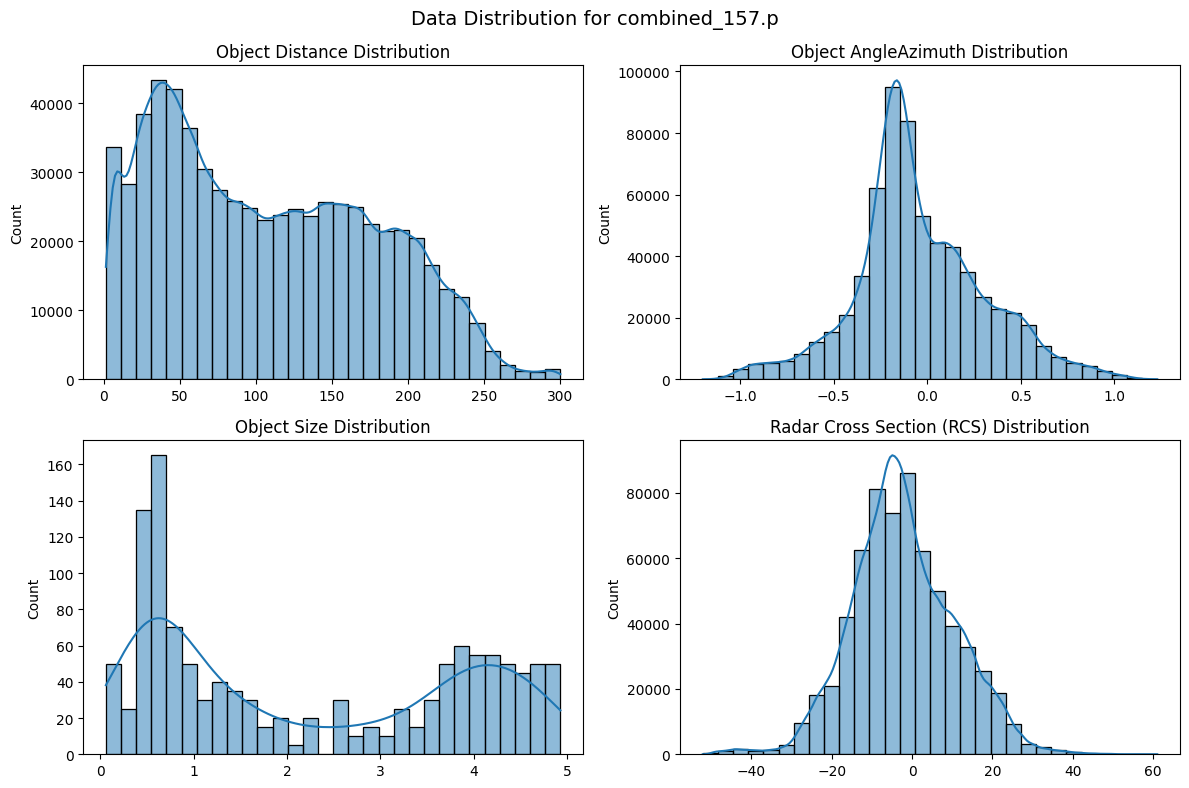


 Validating File: combined_141.p


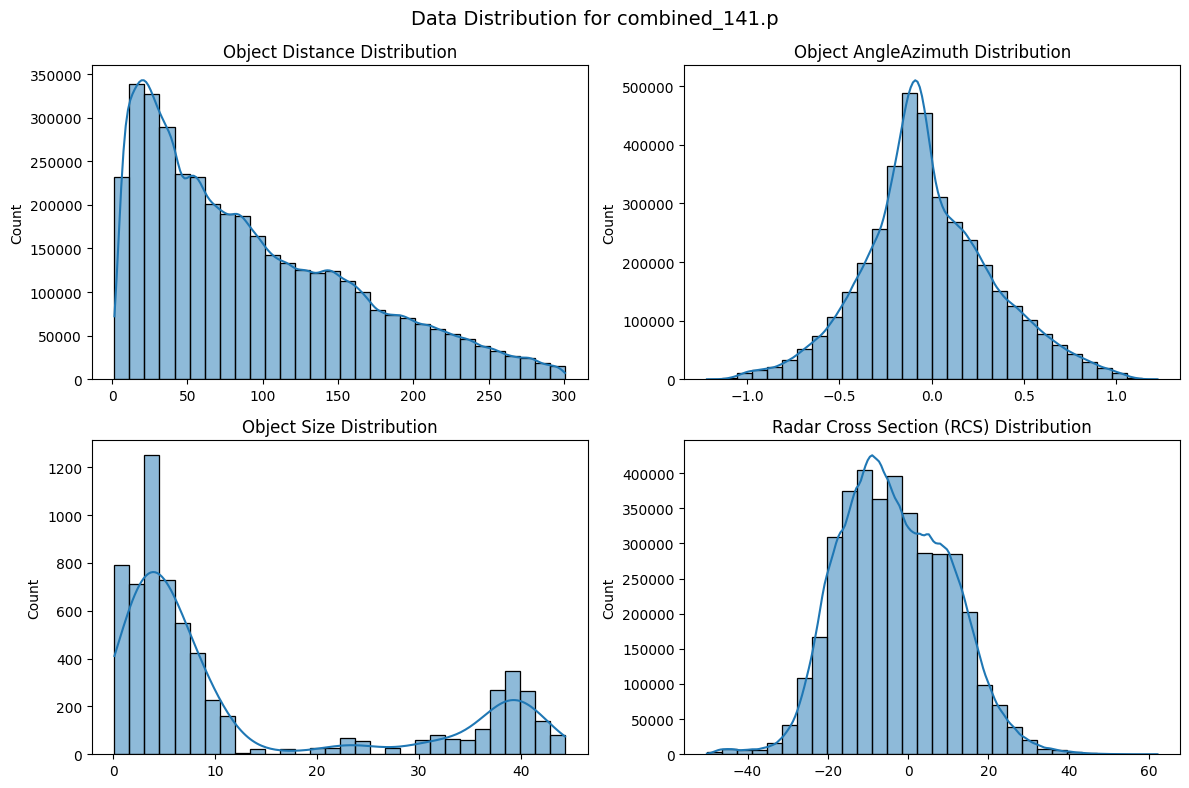


 Validating File: combined_148.p


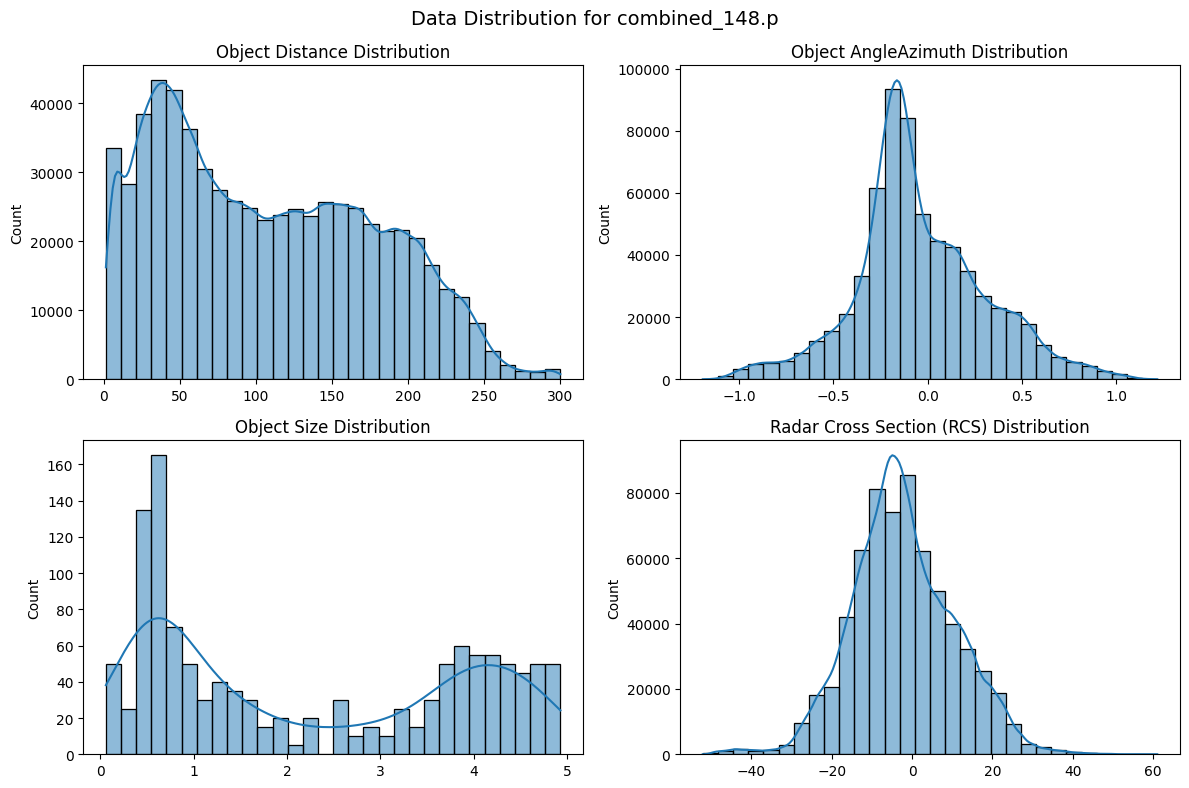


 Validating File: combined_80.p


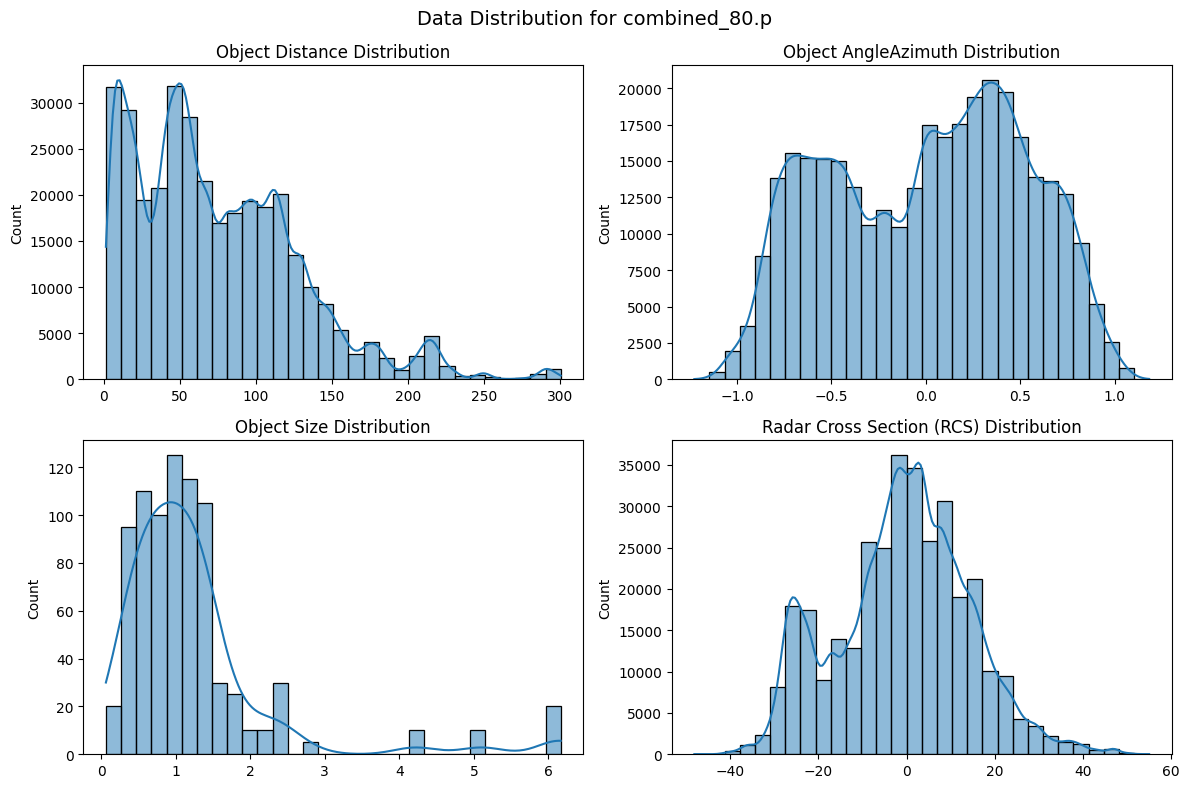


 Validating File: combined_55.p


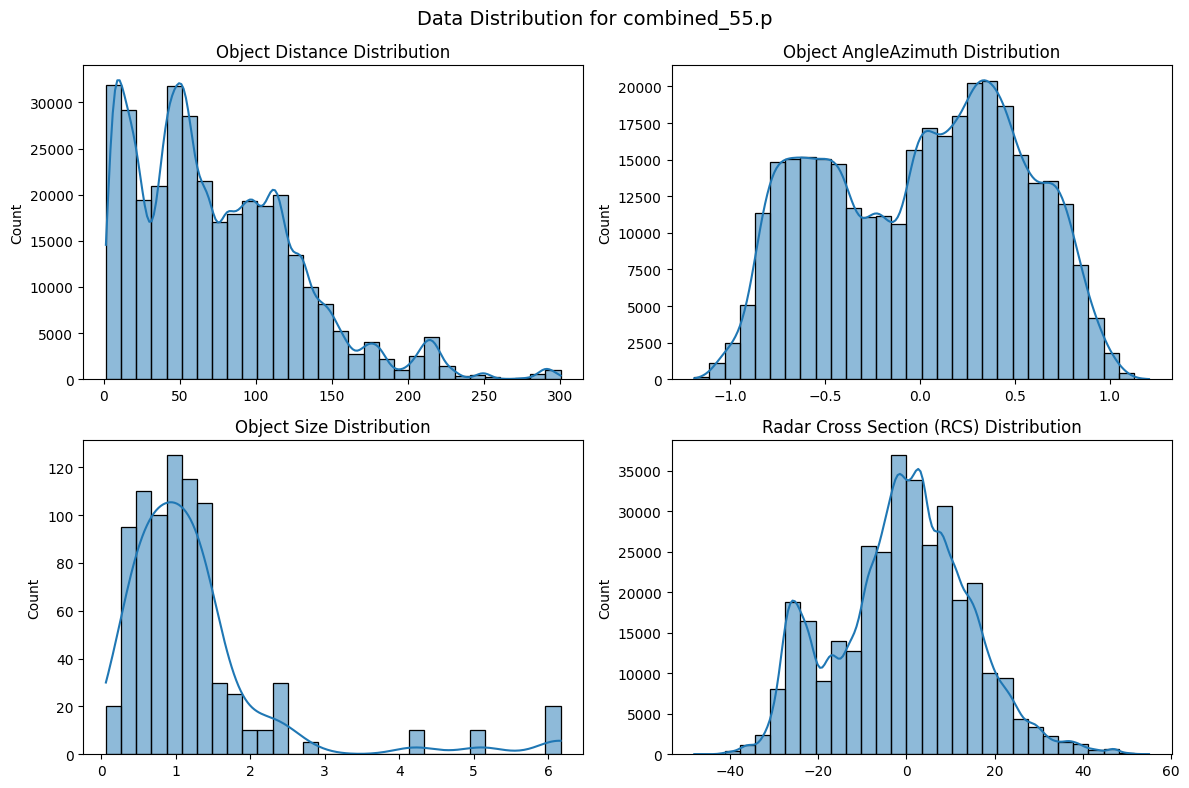


 Validating File: combined_210.p


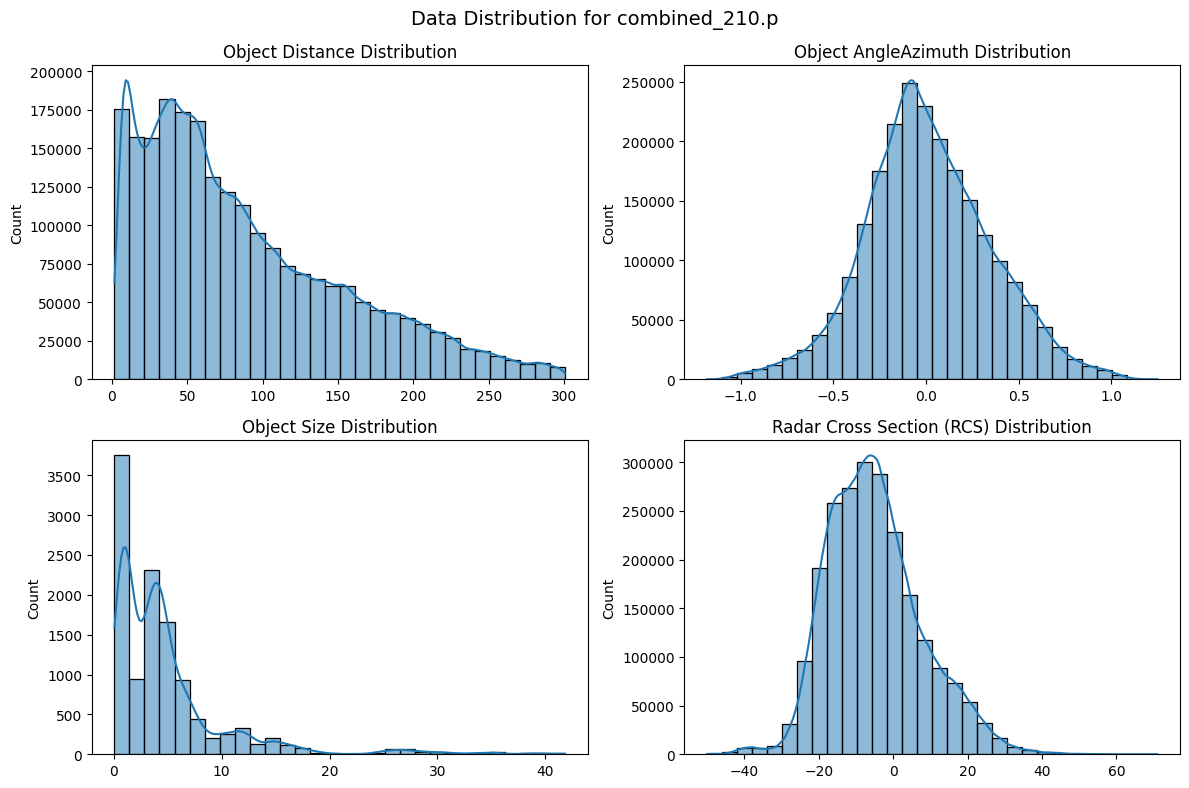


 Validating File: combined_165.p


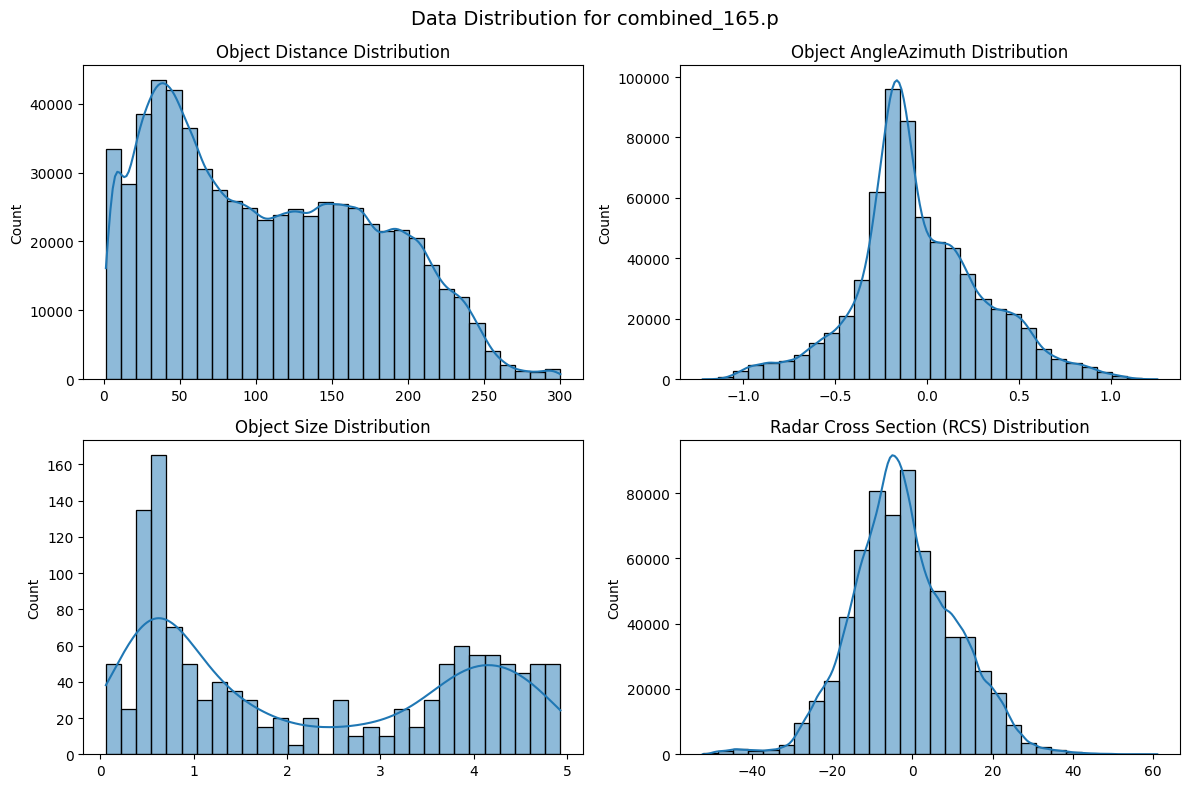


 Validating File: combined_138.p


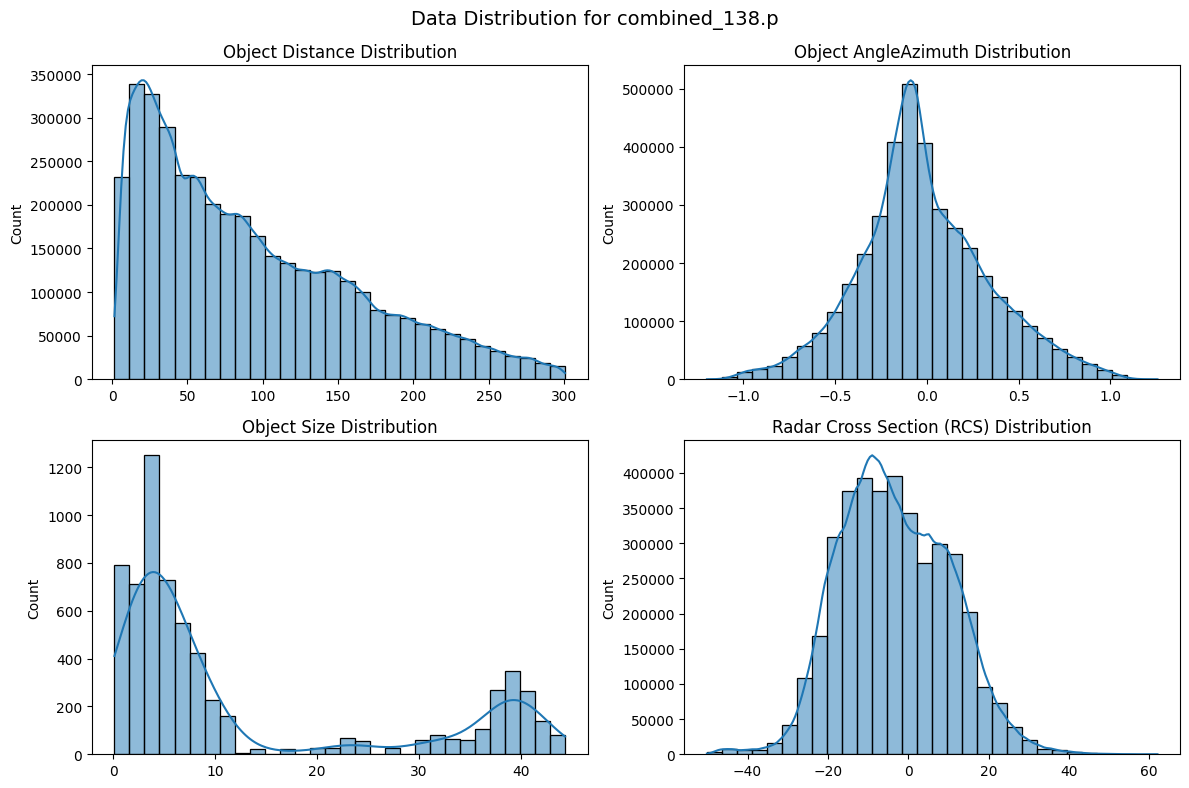


 Validating File: combined_227.p


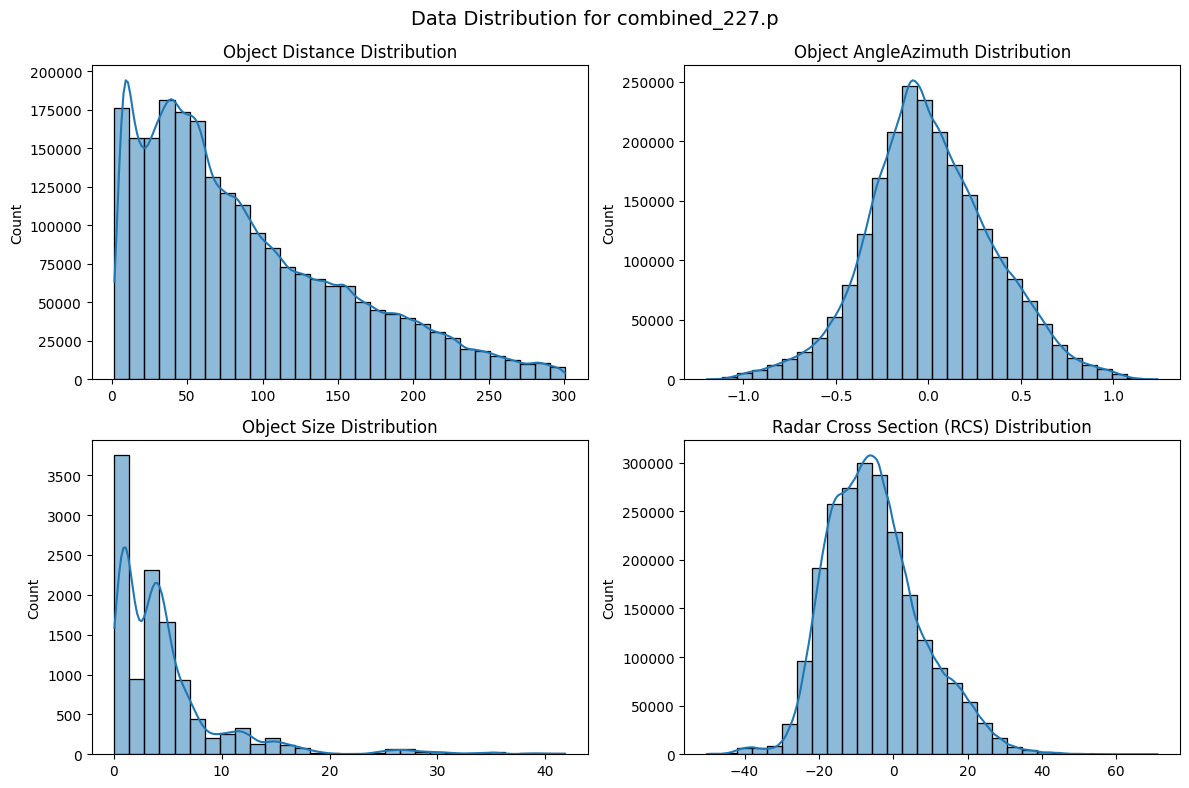


 Validating File: combined_144.p


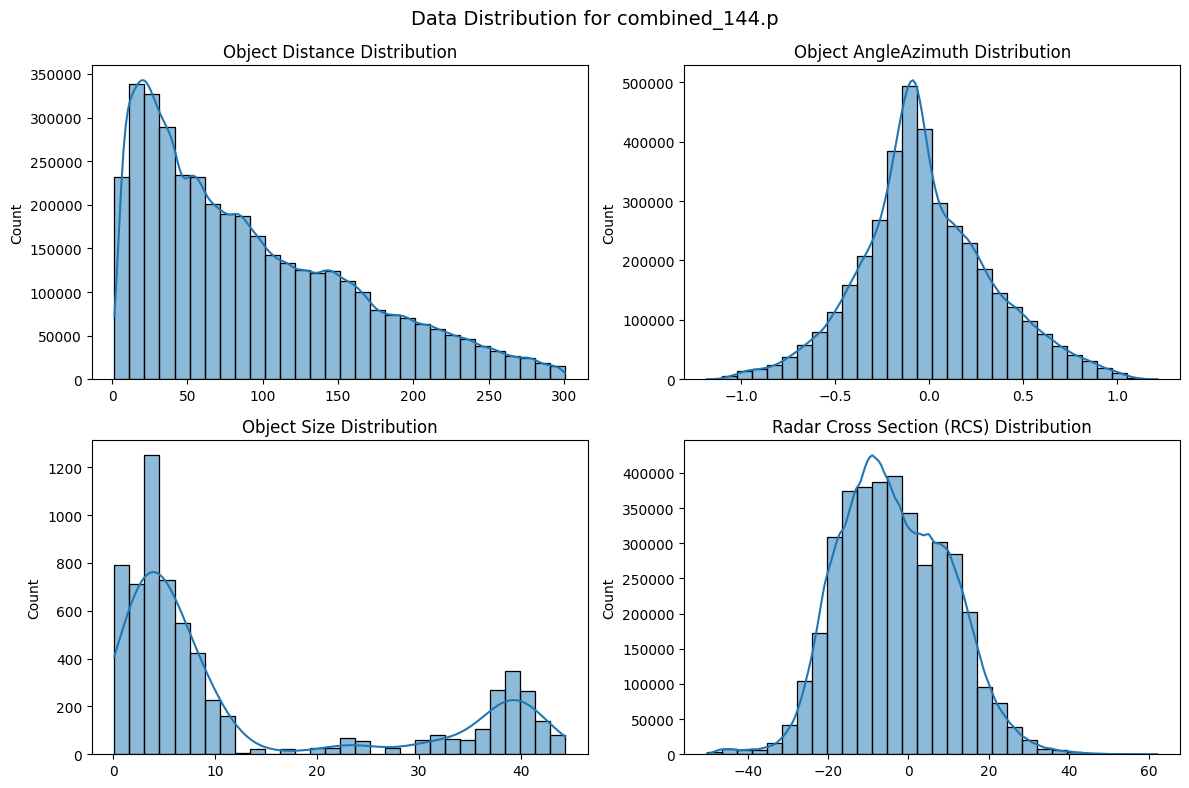


 Validating File: combined_170.p


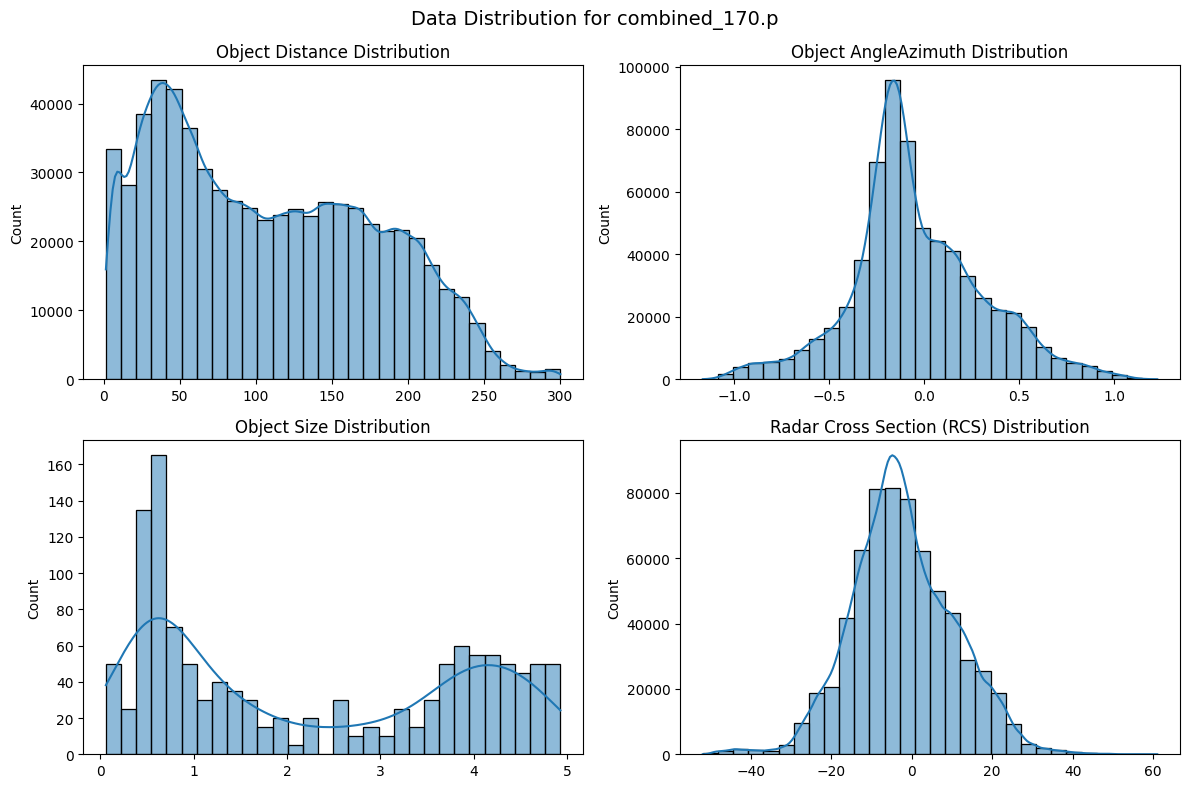


 Validating File: combined_69.p


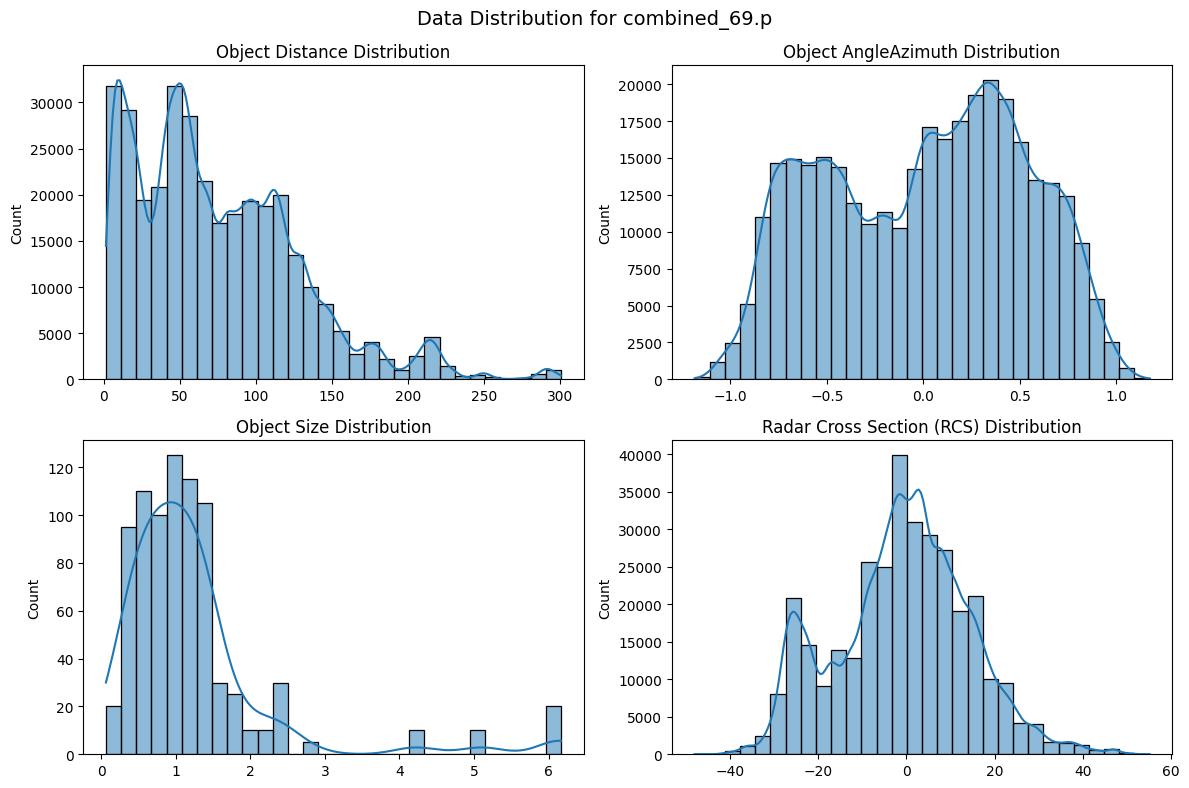


 Validating File: combined_134.p


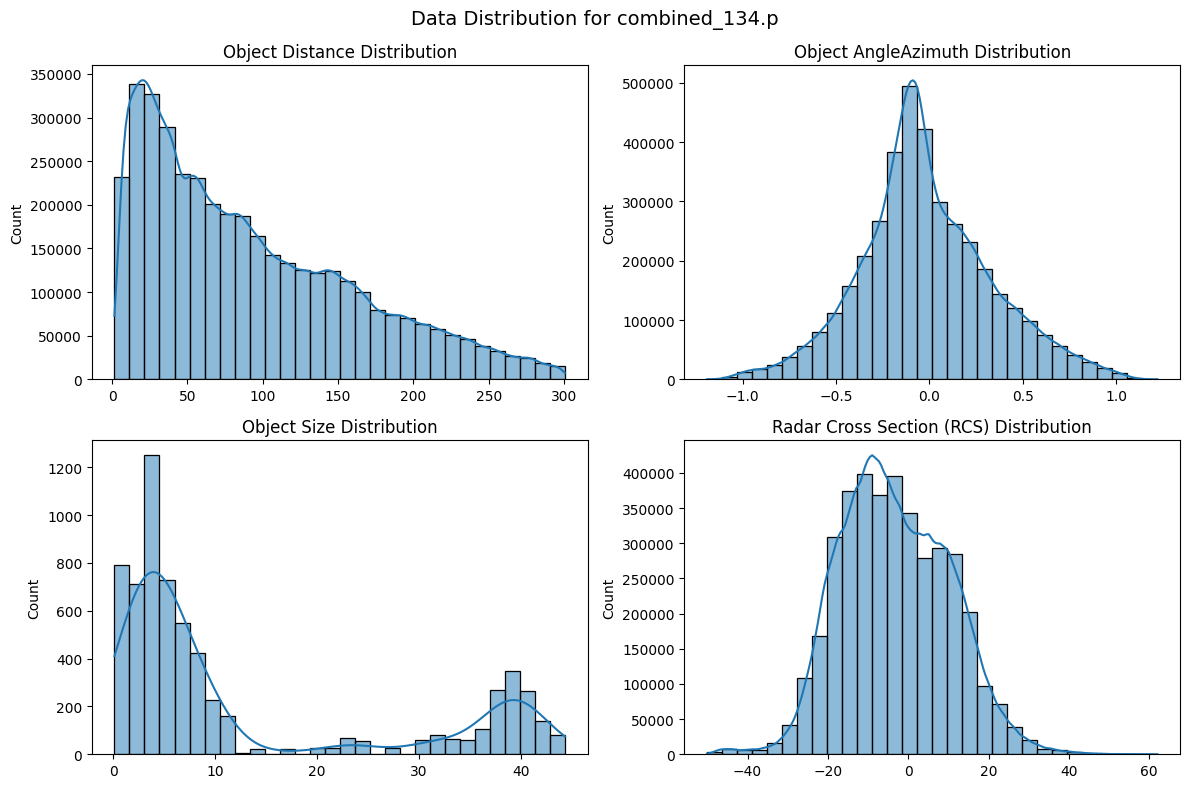


 Validating File: combined_229.p


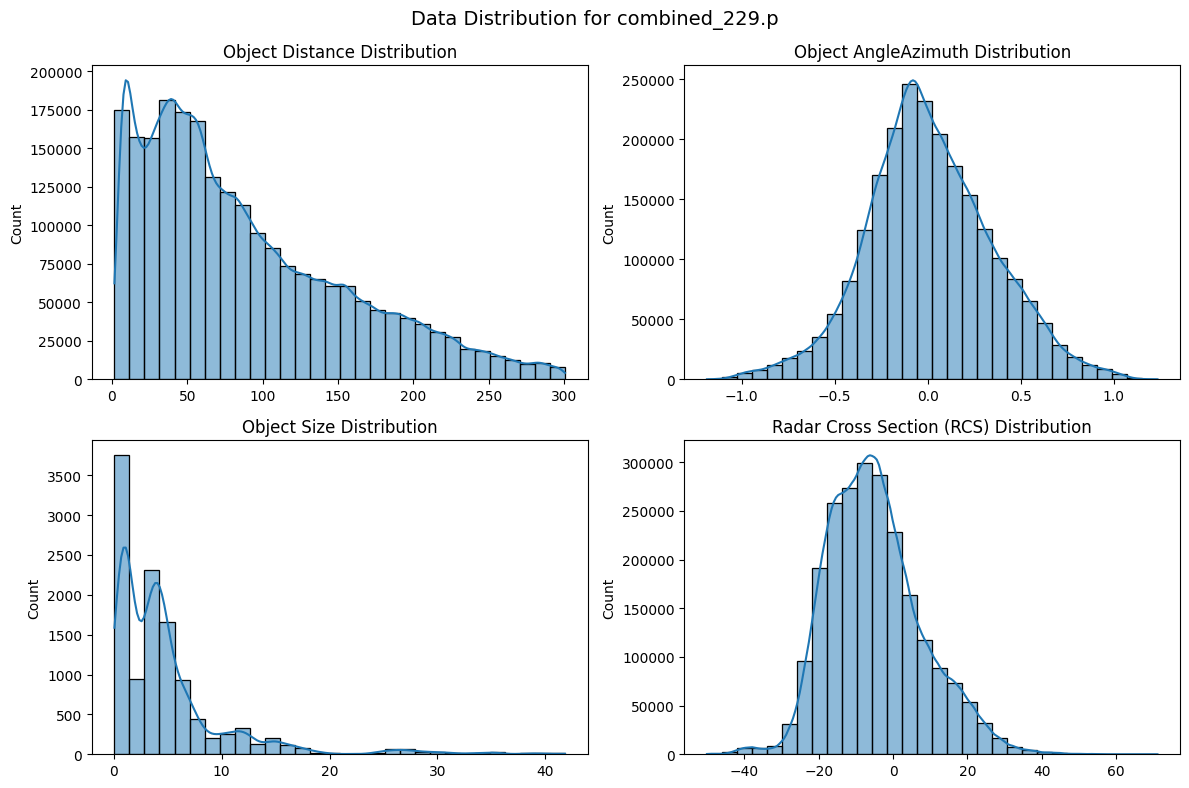


 Validating File: combined_172.p


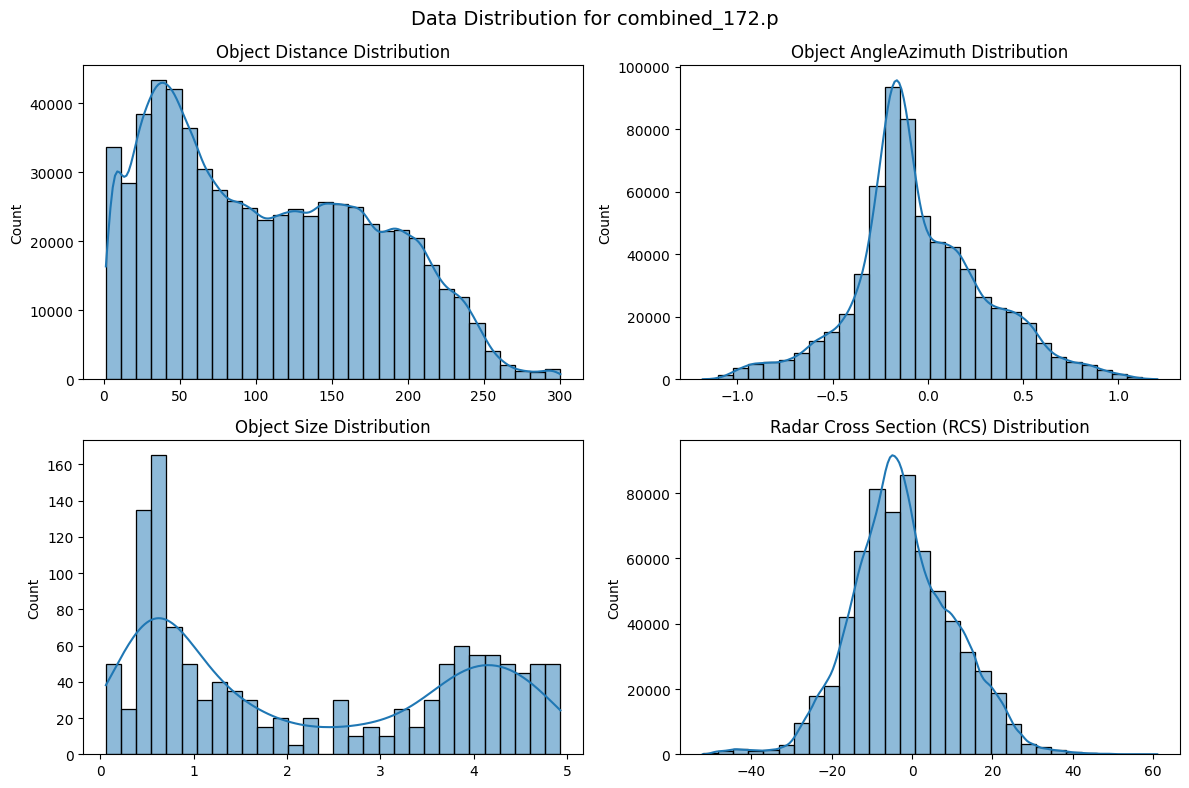


 Validating File: combined_161.p


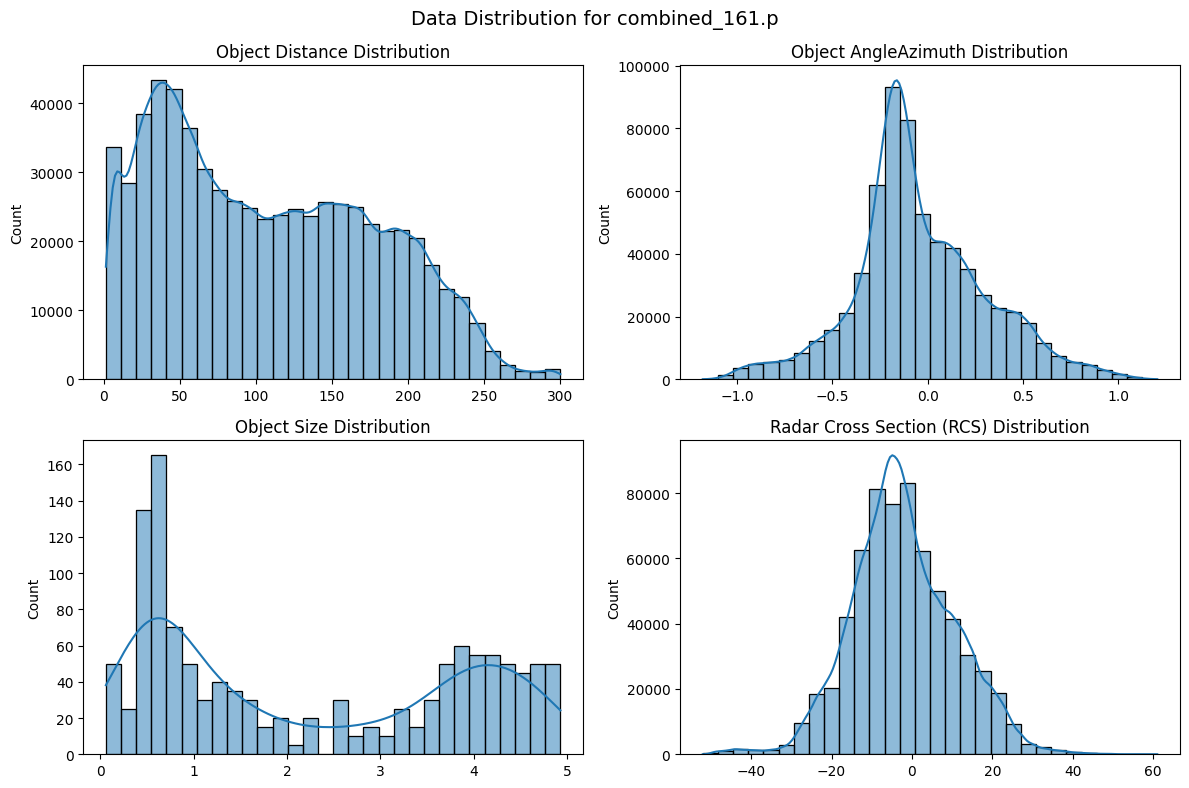


 Validating File: combined_118.p


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Folder Paths (Update These)
data_folder = r"/home/q674749/workspace/thesis_work/rat25-15.4.1/perception/True_Data"

#  Define Relevant Columns
detections_columns = ["objectID", "rcs", "distance", "angleAzimuth", "angleElevation", "radialVelocity", "is_valid_detection"]
objects_columns = ["object_id", "orientation", "width_edge_mean", "length_edge_mean", "centroid_x", "centroid_y", "transformed_x", "transformed_y"]
scalar_columns = ["radialVelocityDomainMax", "yaw_rate", "ego_speed"]

#  Radar Limits & Field of View
radar_range_limit = 250  # Maximum valid range in meters
angle_limit = 60  # Radar FoV limit in degrees

#  Initialize Validation Summary
validation_results = []
files_with_issues = []

#  Function to Validate Each File
def validate_file(filename, df):
    issues = {}

    #  1. Check for Missing Values
    missing_counts = df.isnull().sum()
    if missing_counts.sum() > 0:
        issues["missing_values"] = missing_counts[missing_counts > 0].to_dict()

    #  2. Validate Object & Detection Count Consistency
    df["num_objects"] = df["object_id"].apply(len)
    df["num_detections"] = df["objectID"].apply(len)

    if any(df["num_objects"] == 0):
        issues["empty_objects"] = True
    if any(df["num_detections"] == 0):
        issues["empty_detections"] = True

    #  3. Validate Radar Physics & Realism
    invalid_distance = df["distance"].apply(lambda x: any(d < 0 or d > radar_range_limit for d in x))
    invalid_angle = df["angleAzimuth"].apply(lambda x: any(abs(a) > angle_limit for a in x))

    if invalid_distance.any():
        issues["invalid_distance"] = invalid_distance.sum()
    if invalid_angle.any():
        issues["invalid_angle"] = invalid_angle.sum()

    #  4. Validate Augmentation Consistency
    if "is_augmented" in df.columns:
        augmented_rows = df[df["is_augmented"] == 1]
        original_rows = df[df["is_augmented"] == 0]

        if len(augmented_rows) < len(original_rows):
            issues["augmentation_missing"] = "Less augmented rows than expected"

    #  5. Count Valid & Invalid Detections (Instead of Removing Outliers)
    valid_detections_count = df["is_valid_detection"].apply(lambda x: sum(x)).sum()
    invalid_detections_count = df["is_valid_detection"].apply(lambda x: len(x) - sum(x)).sum()

    issues["valid_detections"] = valid_detections_count
    issues["invalid_detections"] = invalid_detections_count

    #  6. If Issues Found, Add to Report
    if issues:
        files_with_issues.append(filename)
        validation_results.append({"file": filename, "issues": issues})

    return df

#  Function to Plot Data Distributions
def plot_distributions(df, filename):
    """Plot distributions to validate augmented data."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Data Distribution for {filename}", fontsize=14)

    # Distance Histogram
    distances = np.concatenate(df["distance"].values)
    sns.histplot(distances, bins=30, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title("Object Distance Distribution")

    # AngleAzimuth Histogram
    angles = np.concatenate(df["angleAzimuth"].values)
    sns.histplot(angles, bins=30, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title("Object AngleAzimuth Distribution")

    # Object Size Distribution
    sizes = np.concatenate(df["width_edge_mean"].values) * np.concatenate(df["length_edge_mean"].values)
    sns.histplot(sizes, bins=30, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title("Object Size Distribution")

    # RCS Distribution
    rcs_values = np.concatenate(df["rcs"].values)
    sns.histplot(rcs_values, bins=30, kde=True, ax=axes[1, 1])
    axes[1, 1].set_title("Radar Cross Section (RCS) Distribution")

    plt.tight_layout()
    plt.show()

#  Process All Files
for filename in os.listdir(data_folder):
    if filename.endswith(".p"):  
        file_path = os.path.join(data_folder, filename)
        df = pd.read_pickle(file_path)

        print(f"\n Validating File: {filename}")

        # Run validation checks
        df_validated = validate_file(filename, df)

        # Plot distributions for manual inspection
        plot_distributions(df_validated, filename)

#  Print Summary Report
print("\n *Validation Report:*")
if files_with_issues:
    print(f" Total files with issues: {len(files_with_issues)}")
    for issue in validation_results:
        print(f" {issue['file']} → Issues: {issue['issues']}")
else:
    print(" No issues detected! Data is clean and valid.")

print("\n Validation Completed!")